<a href="https://colab.research.google.com/github/Kundan71/EDA-on-IMDB-/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Capstone Project/Telecom Churn Analysis/Telecom Churn.csv'
telecom_churn_df = pd.read_csv(path)

In [ ]:
telecom_churn_df.shape

(3333, 20)

In [ ]:
telecom_churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
churn_copy_df = telecom_churn_df.copy()

Checking for number of null values in datasets.

In [ ]:
churn_copy_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
churn_copy_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

* More people do not leave the service.
* Only 14% of customer were churned out

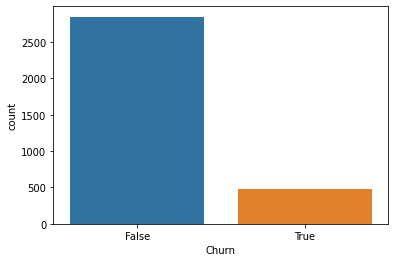

In [ ]:
sns.countplot(data = churn_copy_df, x = 'Churn')
plt.show()

In [ ]:
print('Total percentage of churn = ',100*churn_copy_df[churn_copy_df['Churn']==True].shape[0]/churn_copy_df.shape[0])

Total percentage of churn =  14.491449144914492


In [ ]:
#groupby the data by delivery type
data = churn_copy_df.groupby("Churn")["Churn"].count()
data

Churn
False    2850
True      483
Name: Churn, dtype: int64

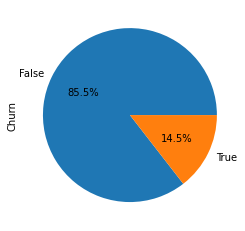

In [ ]:
data.plot.pie(autopct="%.1f%%");

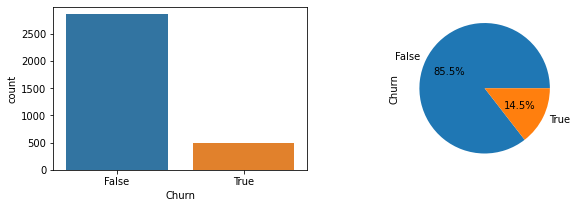

In [ ]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax = sns.countplot(data = churn_copy_df, x = 'Churn')

ax2 = f.add_subplot(122)
ax2 = data.plot.pie(autopct="%.1f%%");
#plt.show()

* Here we can see that lots of customer churned out due to high number of service calls

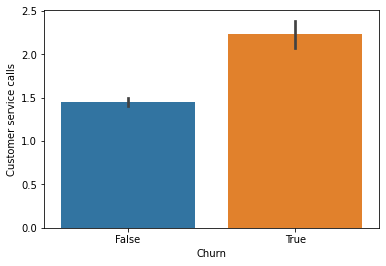

In [ ]:
sns.barplot(x='Churn', y='Customer service calls',data=churn_copy_df)

Maximum service calls were made from area code 415.

In [ ]:
churn_copy_df['Area code'].nunique()

3

In [ ]:
areawise_df = churn_copy_df.groupby('Area code')['Customer service calls'].sum().reset_index()

In [ ]:
areawise_df

,Area code,Customer service calls
0,408,1273
1,415,2572
2,510,1364


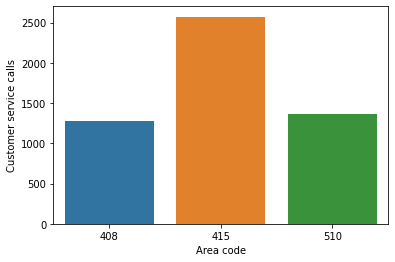

In [ ]:
sns.barplot(x='Area code', y='Customer service calls',data=areawise_df)

* Maximum unsubscribed customers were from area code 415.
* For area code 408 churned percentage is near 25%
* For area code 415 churned percentage is near 48%
* For area code 510 churned percentage is near 26%

In [ ]:
churn_copy_df[churn_copy_df['Churn'] == True].shape

(483, 20)

In [ ]:
count = 0
for row, cols in churn_copy_df.iterrows():
  if cols['Area code'] == 408 and cols['Churn']==True:
    count+=1
count

122

In [ ]:
def churn_percent_by_areacode(code):
  count = 0
  for row, cols in churn_copy_df.iterrows():
    if cols['Area code'] == code and cols['Churn']==True:
      count+=1
  percent_count = 100*count/churn_copy_df[churn_copy_df['Churn'] == True].shape[0]
  return print(f'For area code {code} the unsubscribed customer is {percent_count}%')

In [ ]:
churn_copy_df[churn_copy_df['Churn'] == True].shape[0]

483

In [ ]:
area_code = [408,415,510]
for code in area_code:
  churn_percent_by_areacode(code)

For area code 408 the unsubscribed customer is 25.25879917184265%
For area code 415 the unsubscribed customer is 48.86128364389234%
For area code 510 the unsubscribed customer is 25.87991718426501%


In [ ]:
area_code_count_df

,Area_code,Unsubscribed_percent
0,408,25.258799
1,415,48.861284
2,510,25.879917


In [ ]:
areawise_df1 = churn_copy_df.groupby('Area code')['Customer service calls'].sum()

In [ ]:
areawise_df1

Area code
408    1273
415    2572
510    1364
Name: Customer service calls, dtype: int64

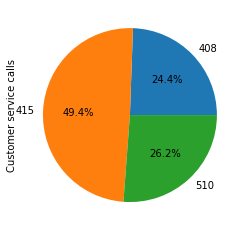

In [ ]:
areawise_df1.plot.pie(autopct="%.1f%%");

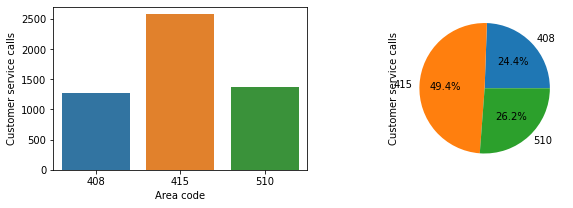

In [ ]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax = sns.barplot(x='Area code', y='Customer service calls',data=areawise_df)

ax2 = f.add_subplot(122)
ax2 = areawise_df1.plot.pie(autopct="%.1f%%");

* There are total of 51 unique state 
* There were 18 states where more than 10 customers were churned out.

In [ ]:
churn_copy_df['State'].nunique()

51

In [ ]:
churn_copy_df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
lst=[]
for name,group in churn_copy_df.groupby(['State','Churn']):
    lst.append([name[1],name[0],group.shape[0]])

In [ ]:
state_count_df = pd.DataFrame(lst)
state_count_df.columns=['Churn','State','Count']

In [ ]:
state_count_df.head(5)

,Churn,State,Count
0,False,AK,49
1,True,AK,3
2,False,AL,72
3,True,AL,8
4,False,AR,44


In [ ]:
import plotly.express as px

#long_df = px.data.df_state_count()

fig = px.bar(state_count_df, x="State", y="Count", color="Count", title="No of Unsubscription by State").update_xaxes(categoryorder ='total ascending')
fig.show()

In [ ]:
state_with_high_unsubs_df = state_count_df[(state_count_df['Churn'] == True) & (state_count_df['Count'] > 10)]

In [ ]:
state_with_high_unsubs_df['State'].nunique()

18

* We can see that not many users opt for International plans who were churned out.


In [ ]:
unsubscribed_df = churn_copy_df[churn_copy_df['Churn']==True]

In [ ]:
churn_copy_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
churn_copy_df.groupby('Churn')['International plan'].value_counts()

Churn  International plan
False  No                    2664
       Yes                    186
True   No                     346
       Yes                    137
Name: International plan, dtype: int64

Text(14.124479166666674, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

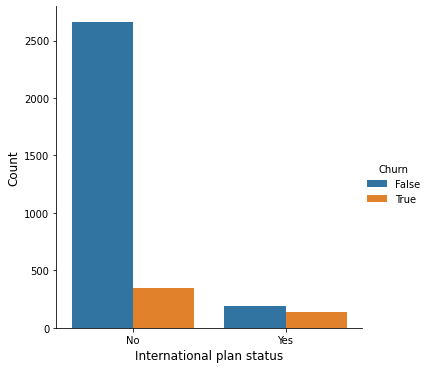

In [ ]:
plt.figure(figsize = (15,8))
sns.catplot(data = churn_copy_df, x ='International plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

* Users who Have an international plan are relatively very less than those who do not.
* We can also observe that people who have an international plan have almost equal churn rate.

In [ ]:
churn_intel_plan_df = unsubscribed_df.groupby('International plan')['Churn'].count().reset_index()

In [ ]:
churn_intel_plan_df2 = unsubscribed_df.groupby('International plan')['Churn'].count()

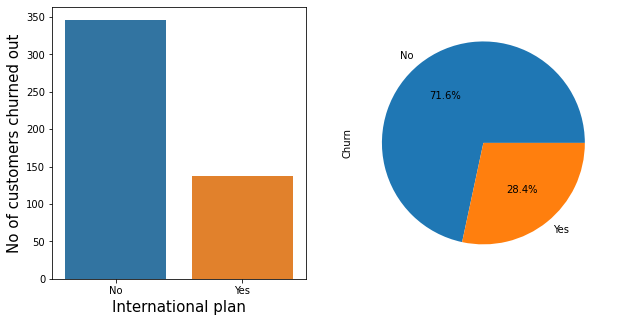

In [ ]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax = sns.barplot(x='International plan', y='Churn', data=churn_intel_plan_df)
ax = plt.ylabel('No of customers churned out', fontsize = 15)
ax = plt.xlabel('International plan', fontsize = 15)

ax2 = f.add_subplot(122)
ax2 = churn_intel_plan_df2.plot.pie(autopct="%.1f%%");

In [ ]:
subscribed_df = churn_copy_df[churn_copy_df['Churn'] == False]

In [ ]:
f = plt.figure(figsize=(15,8))
ax =  px.box(unsubscribed_df,x="International plan",color ='International plan',points="all")
ax.show()
ax2 =  px.box(subscribed_df,x="International plan",color ='International plan',points="all")
ax2.show()

<Figure size 1080x576 with 0 Axes>

* Many users do not opt for a voice mail plan

In [ ]:
churn_copy_df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
churn_copy_df.groupby('Churn')['Voice mail plan'].value_counts()

Churn  Voice mail plan
False  No                 2008
       Yes                 842
True   No                  403
       Yes                  80
Name: Voice mail plan, dtype: int64

Text(14.145746527777781, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

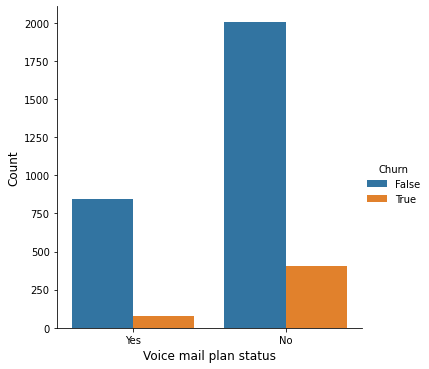

In [ ]:
plt.figure(figsize = (15,8))
sns.catplot(data = churn_copy_df, x ='Voice mail plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('Voice mail plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

In [ ]:
churn_voice_mail_plan_df = unsubscribed_df.groupby('Voice mail plan')['Churn'].count().reset_index()
churn_voice_mail_plan_df

,Voice mail plan,Churn
0,No,403
1,Yes,80


In [ ]:
churn_voice_mail_plan_df2 = unsubscribed_df.groupby('Voice mail plan')['Churn'].count()

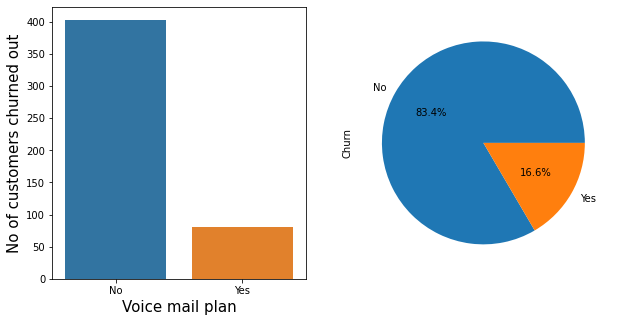

In [ ]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax = sns.barplot(x='Voice mail plan', y='Churn', data=churn_voice_mail_plan_df)
ax = plt.ylabel('No of customers churned out', fontsize = 15)
ax = plt.xlabel('Voice mail plan', fontsize = 15)

ax2 = f.add_subplot(122)
ax2 = churn_voice_mail_plan_df2.plot.pie(autopct="%.1f%%");

In [ ]:
f = plt.figure(figsize=(15,8))
ax =  px.box(unsubscribed_df,x="Voice mail plan",color ='Voice mail plan',points="all")
ax.show()
ax2 =  px.box(subscribed_df,x="Voice mail plan",color ='Voice mail plan',points="all")
ax2.show()

<Figure size 1080x576 with 0 Axes>

* Maximum churned out costumers were do not have both International and Voice mail plan

In [ ]:
churn_voice_mail_plan_df = unsubscribed_df.groupby(['Voice mail plan','International plan'])['Churn'].count().reset_index()
churn_voice_mail_plan_df

,Voice mail plan,International plan,Churn
0,No,No,302
1,No,Yes,101
2,Yes,No,44
3,Yes,Yes,36


In [ ]:
fig = px.box(churn_copy_df, x="Churn", y= 'Account length',color ='Churn', points="all")
fig.show()

* Analysis of only those people who did not churn out and account record is higher than the average account record of unsubscribers.

In [ ]:
# mean account length of people who churn out
churn_copy_df[(churn_copy_df['Churn']==True)].agg({'Account length':'mean'})

Account length    102.664596
dtype: float64

In [ ]:
# people who did not churn out and have account length higher than those who unsubscribed.
not_churned_and_avg_ac_len_df = churn_copy_df[(churn_copy_df['Churn']==False) & (churn_copy_df['Account length']>= 102)]
not_churned_and_avg_ac_len_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [ ]:
# analysizing the International plan
df = not_churned_and_avg_ac_len_df.groupby(['Area code'])['International plan'].value_counts()
df

Area code  International plan
408        No                    331
           Yes                    21
415        No                    635
           Yes                    46
510        No                    325
           Yes                    27
Name: International plan, dtype: int64

In [ ]:
df1 =(not_churned_and_avg_ac_len_df['International plan']=='Yes').mean()
df1
df2= (churn_copy_df['International plan']=='Yes').mean()
df2
print(f'the average availers of international plan who did not churn out is  {round(df1,3)*100} which is less than overall mean of international plan availers{round(df2,3)*100}')
print('so we can conclude that non-international plan users are less prone to churn out')

the average availers of international plan who did not churn out is  6.800000000000001 which is less than overall mean of international plan availers9.700000000000001
so we can conclude that non-international plan users are less prone to churn out


In [ ]:
#analysing voice mail plan service
df3 = not_churned_and_avg_ac_len_df.groupby(['Area code'])['Voice mail plan'].value_counts()
df3

Area code  Voice mail plan
408        No                 263
           Yes                 89
415        No                 459
           Yes                222
510        No                 252
           Yes                100
Name: Voice mail plan, dtype: int64

In [ ]:
df4 =(not_churned_and_avg_ac_len_df['Voice mail plan']=='Yes').mean()
df5= (churn_copy_df['Voice mail plan']=='Yes').mean()
print(f'the average availers of voice mail plan who did not churn out is  {round(df4,3)*100}% which is more than overall mean of voice mail plan availers {round(df5,3)*100} %')
print('so we can conclude that voice mail plan subscribers  are less prone to churn out.')

the average availers of voice mail plan who did not churn out is  29.7% which is more than overall mean of voice mail plan availers 27.700000000000003 %
so we can conclude that voice mail plan subscribers  are less prone to churn out.


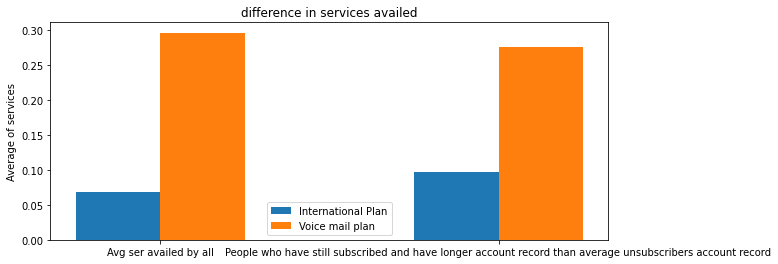

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Avg ser availed by all', 'People who have still subscribed and have longer account record than average unsubscribers account record']
data = [df1,df2]
data1 = [df4,df5]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 4))
rects1 = ax.bar(x - width/2, data, width, label='International Plan')
rects2 = ax.bar(x + width/2, data1, width, label='Voice mail plan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of services')
ax.set_title('difference in services availed')
ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
churn_total_df = churn_copy_df.copy()

In [ ]:
#Creating three columns for total minutes, total calls and total charges
churn_total_df['Total minutes'] = churn_copy_df['Total day minutes'] + churn_copy_df['Total eve minutes'] + churn_copy_df['Total night minutes']
churn_total_df['Total calls'] = churn_copy_df['Total day calls'] + churn_copy_df['Total eve calls'] + churn_copy_df['Total night calls']
churn_total_df['Total charges'] = churn_copy_df['Total day charge'] + churn_copy_df['Total eve charge'] + churn_copy_df['Total night charge']
#churn_copy2_df['Total charges+intel'] = churn_copy_df['Total day charge'] + churn_copy_df['Total eve charge'] + churn_copy_df['Total night charge'] + churn_copy_df['Total intl charge']

In [ ]:
churn_total_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls,Total charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36


In [ ]:
churn_total_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


We can see that more calls are made in the morning with respect to the evening and night when it is the lowest.

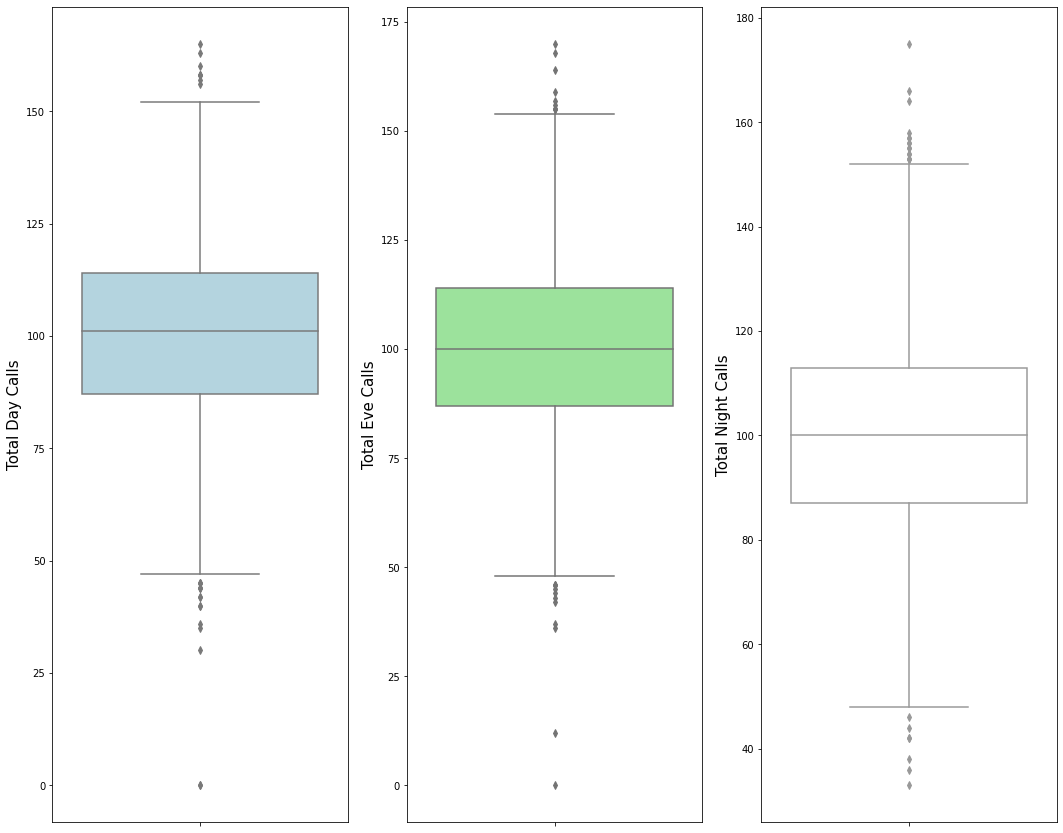

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=churn_total_df, y = 'Total day calls', color = 'lightblue')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = churn_total_df, y = 'Total eve calls', color = 'lightgreen')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=churn_total_df, y = 'Total night calls', color = 'white')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

* Despite having more calls made during the day, we can see that users do not spend longer time on the calls in the morning.
* Users tend to talk for longer time in the afternoon than other times.

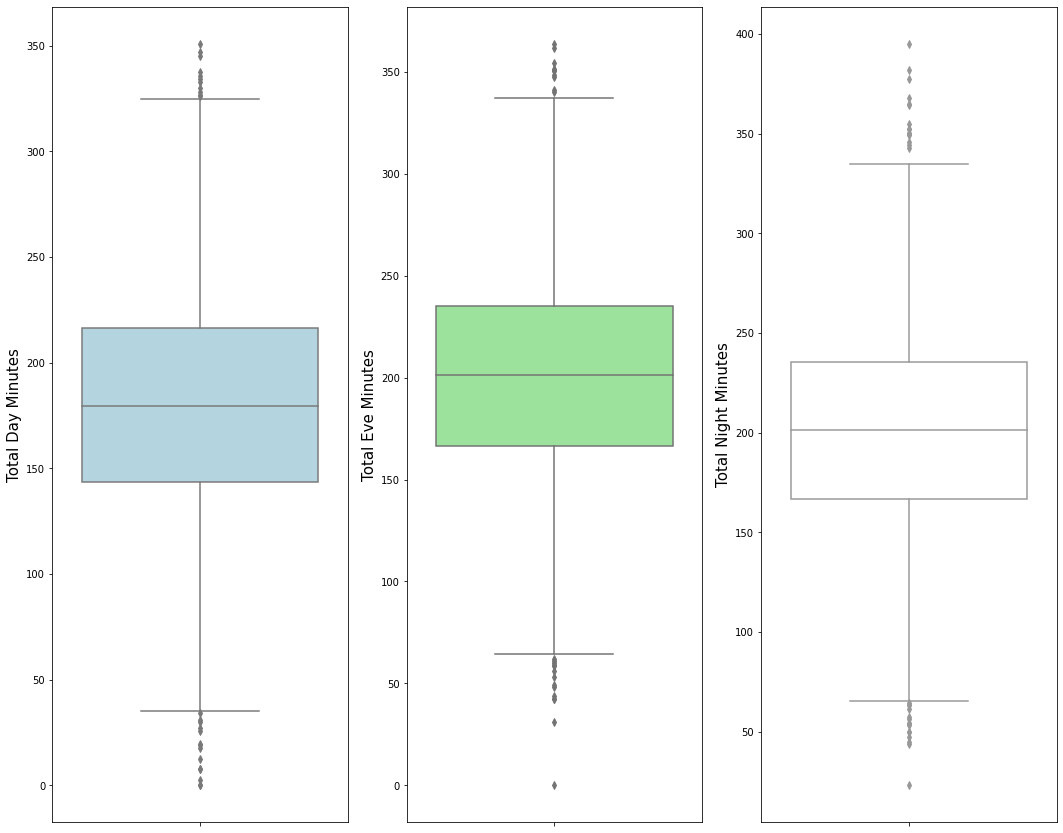

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=churn_total_df, y = 'Total day minutes', color = 'lightblue')
plt.ylabel('Total Day Minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = churn_total_df, y = 'Total eve minutes', color = 'lightgreen')
plt.ylabel('Total Eve Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=churn_total_df, y = 'Total night minutes', color = 'white')
plt.ylabel('Total Night Minutes', fontsize = 15)

plt.show()

* The charges are maximum in the evening time and lowest in the night time.
* These plots are in conjunction with the minutes spoken.

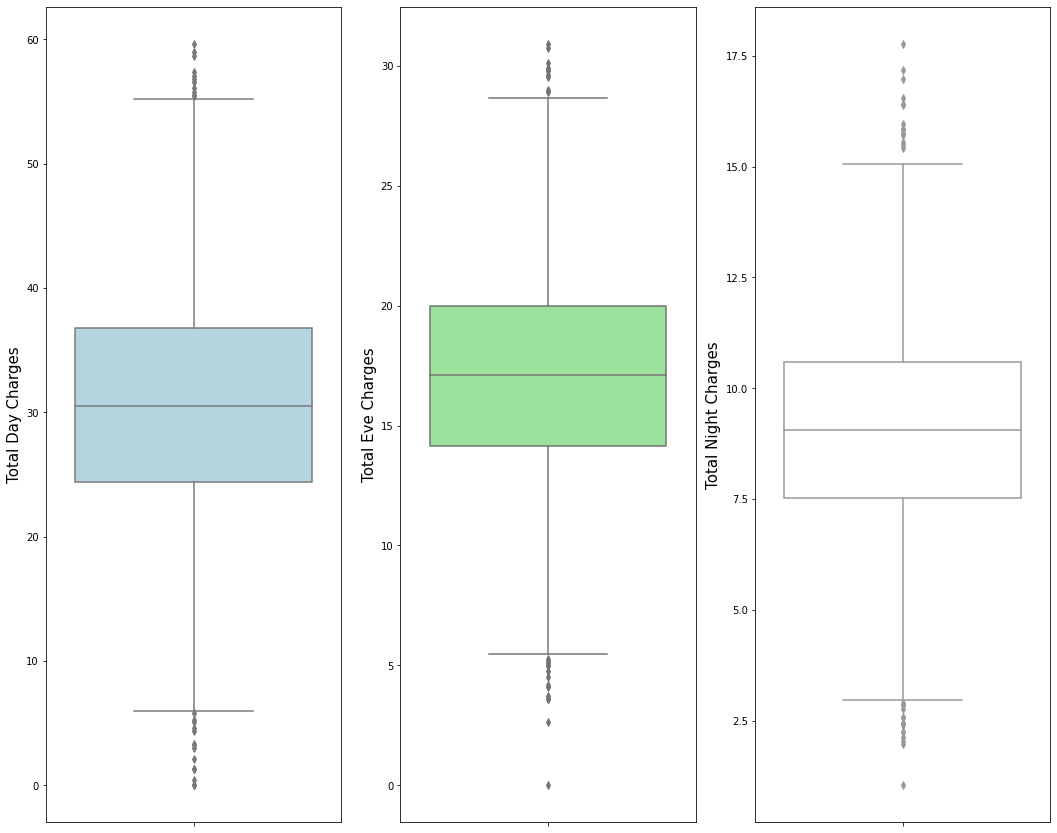

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=churn_total_df, y = 'Total day charge', color = 'lightblue')
plt.ylabel('Total Day Charges', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = churn_total_df, y = 'Total eve charge', color = 'lightgreen')
plt.ylabel('Total Eve Charges', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=churn_total_df, y = 'Total night charge', color = 'white')
plt.ylabel('Total Night Charges', fontsize = 15)

plt.show()

* Each attribute is consistent with each other suggesting normal pricing for calls made.

Text(0, 0.5, 'Total Charges')

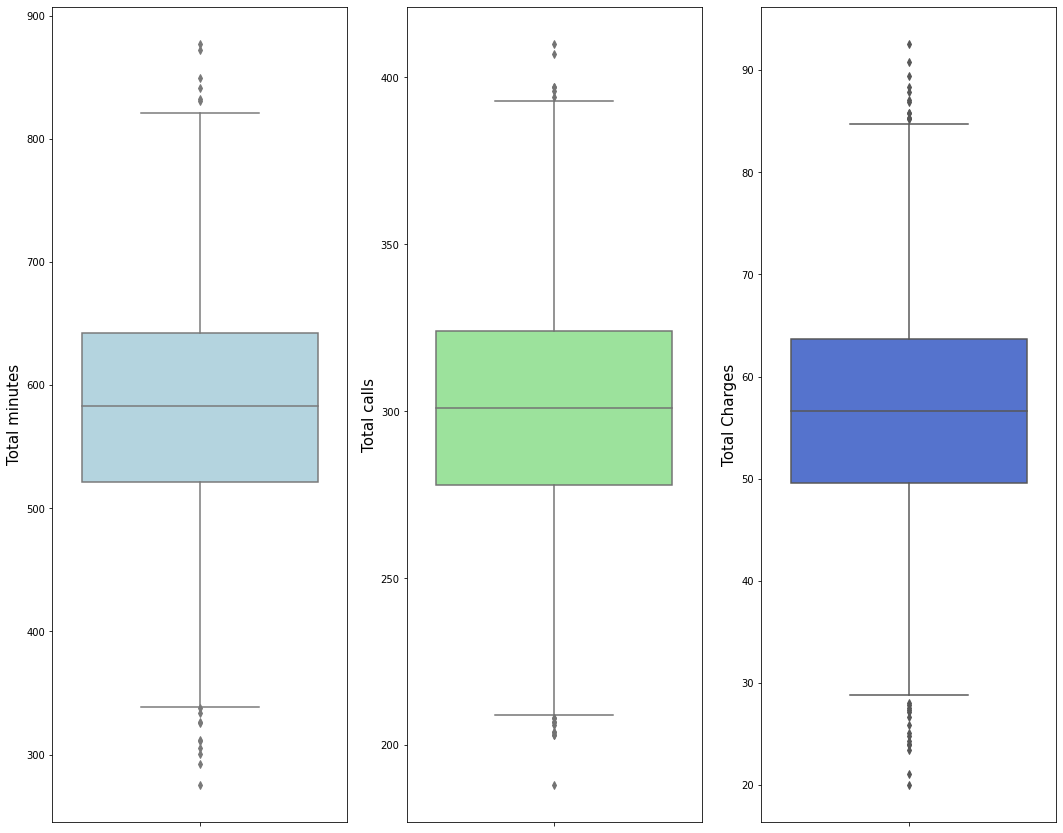

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(1,3,1)
sns.boxplot(data = churn_total_df, y = 'Total minutes', color = 'lightblue')
plt.ylabel('Total minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = churn_total_df, y = 'Total calls', color = 'lightgreen')
plt.ylabel('Total calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = churn_total_df, y = 'Total charges', color = 'royalblue')
plt.ylabel('Total Charges', fontsize = 15)

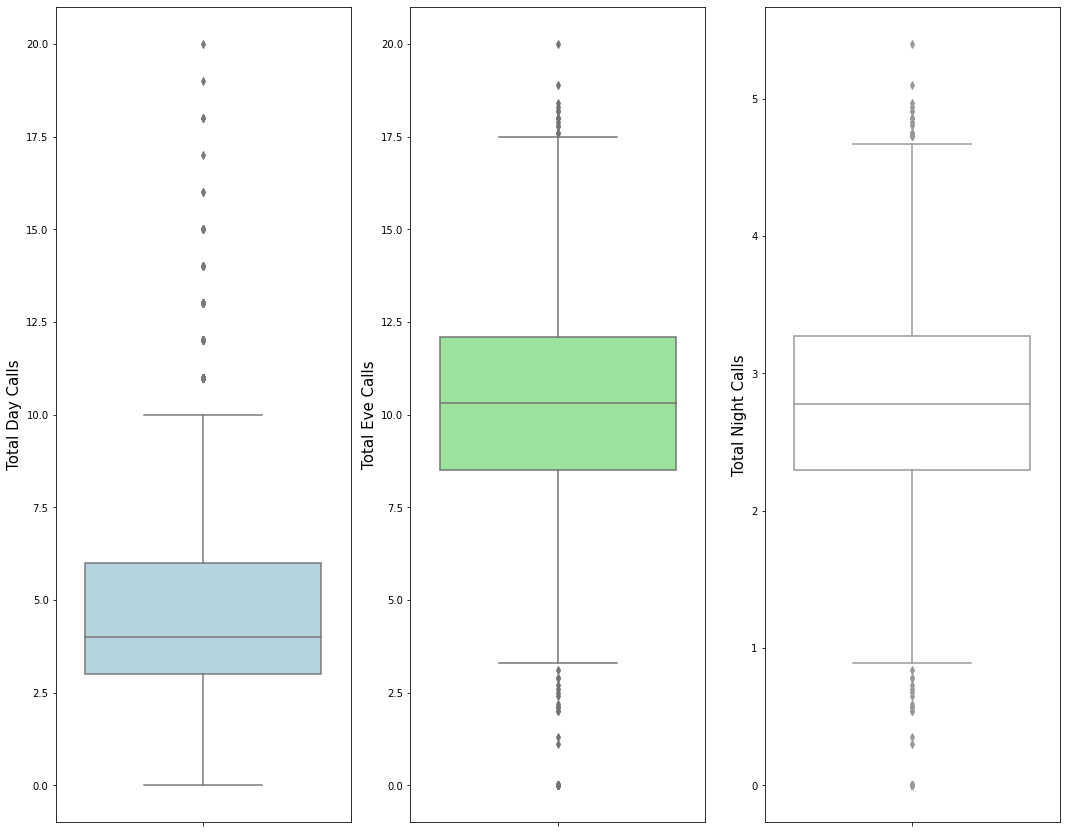

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=churn_total_df, y = 'Total intl calls', color = 'lightblue')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = churn_total_df, y = 'Total intl minutes', color = 'lightgreen')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=churn_total_df, y = 'Total intl charge', color = 'white')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

In [ ]:
corr_df = churn_copy_df.corr()

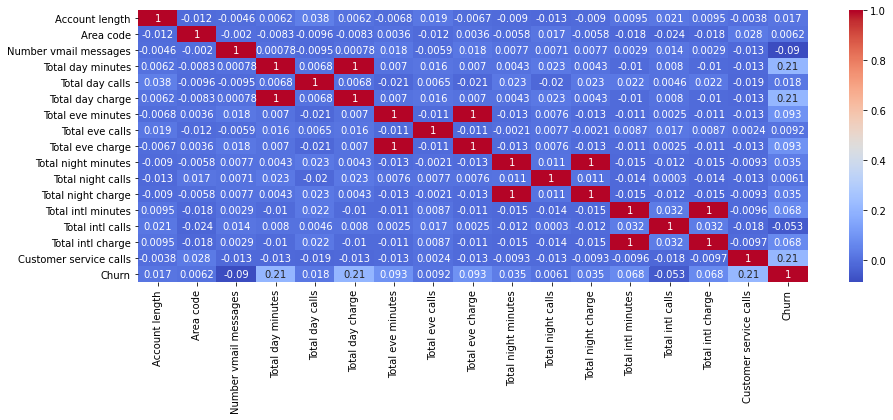

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_df,annot = True, cmap = 'coolwarm')

With respect to churn
* Total day minutes to Churn at 0.2
* Total day charge to Churn at 0.2
* Customer service calls to Churn at 0.2


Other relations:
* Total day charge to Total day minutes at 1
* Total evening charge to total eve minutes at 1
* total night charge to total night minutes at 1

In [ ]:
churn_copy_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

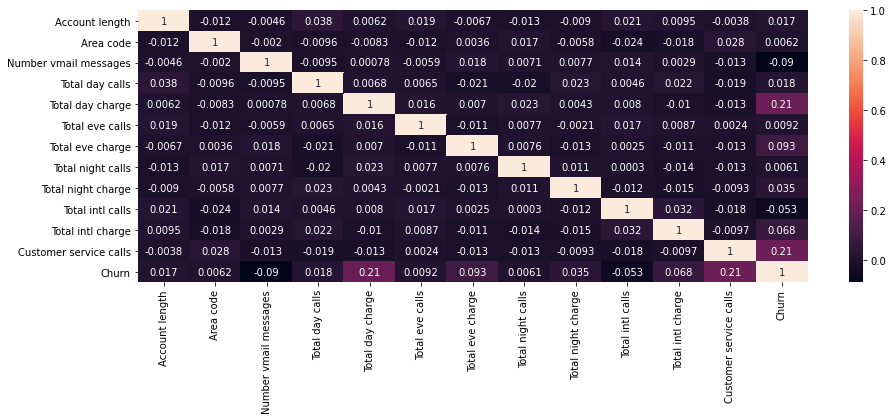

In [ ]:
corr_f2_df = churn_copy_df.copy()
corr_f2_df = corr_f2_df.drop(['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'],axis=1)

corr_df2 = corr_f2_df.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr_df2,annot = True)

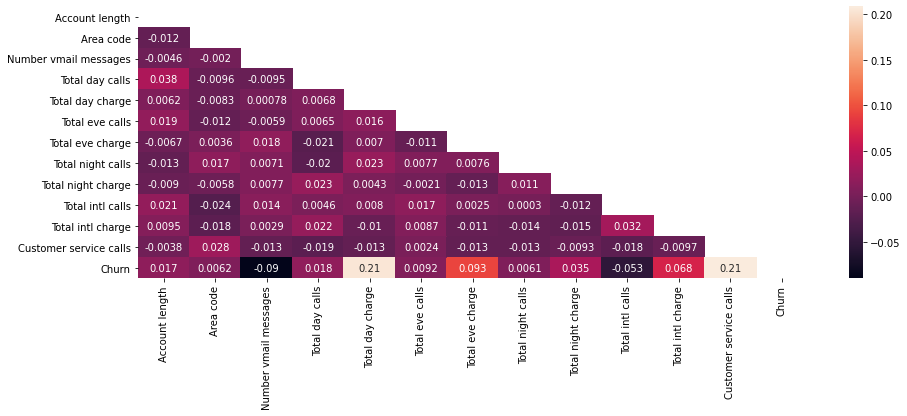

In [ ]:
matrix = np.triu(corr_f2_df.corr())
plt.figure(figsize=(15,5))
sns.heatmap(corr_f2_df.corr(), annot=True, mask=matrix)

* We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.
* At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

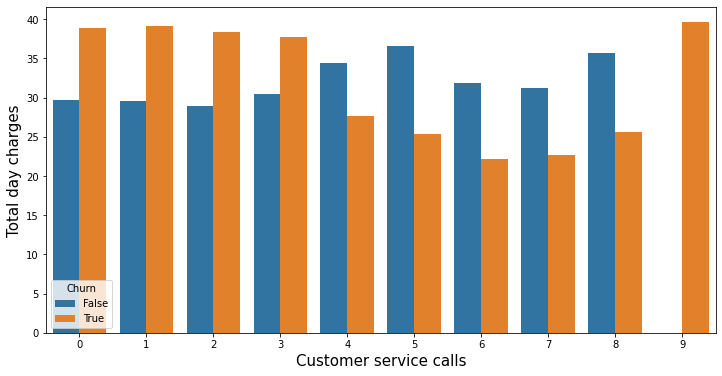

In [ ]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(12,6))
sns.barplot(data = churn_copy_df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()

* A linear relationship can be observed between the two Variables.

* Visible Churn can be seen with higher charges imposed when spoken for longer times.

<Figure size 1080x432 with 0 Axes>

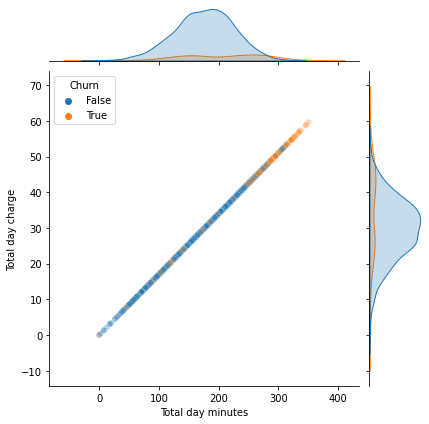

In [ ]:
plt.figure(figsize = (15,6))
sns.jointplot(data = churn_copy_df, x = 'Total day minutes', y = 'Total day charge',
                hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 13)
plt.ylabel('Total Day Charges', fontsize = 13)
plt.show()

* We can observe from the three scatterplots that the churn rate is maximum times True in the Day.
* In the evening and night we can see that the churn rate is not so relevant.

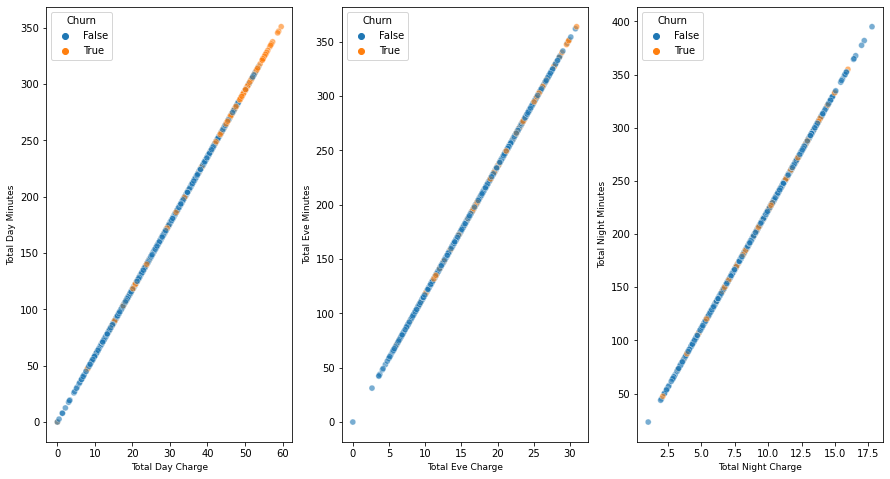

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = churn_copy_df, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = churn_copy_df, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = churn_copy_df, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

# **Conclusion**
* Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning.
* It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
* International plan users are more consistent with their churn w.r.t the ones who do not have the service.

**Prescription:**
* Introducing plans which minimize costs for more number of calls can be used.
* Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
* Improvement in the customer service can be done to reduce the number of calls which cause the churn.